
Quantum Data Encoding Circuit:
     ┌─────────────────────────────────────────────┐
q_0: ┤0                                            ├
     │  Initialize(0.18257,0.36515,0.54772,0.7303) │
q_1: ┤1                                            ├
     └─────────────────────────────────────────────┘


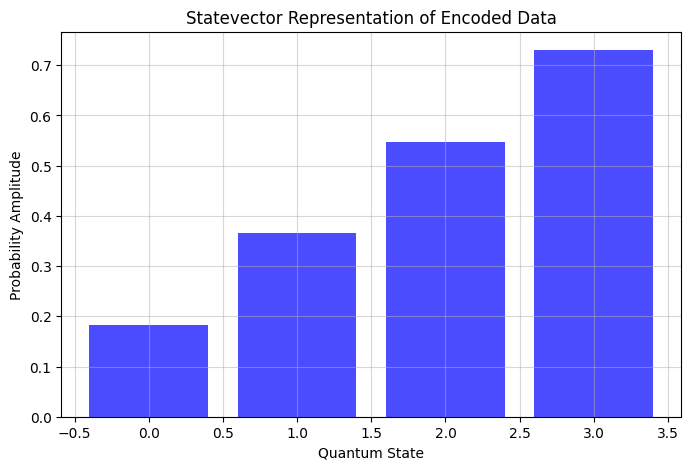

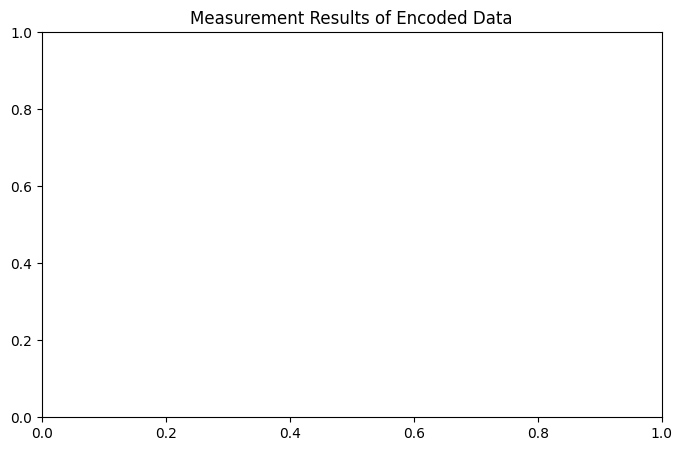

In [1]:
#-------------------------------------------------------------------------
# Quantum Data Encoding with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import circuit_drawer, plot_histogram

#-------------------------------------------------------------------------
# Visualization Functions
# Quantum Circuit Diagram:    Shows how data is encoded into quantum states.
# Statevector Representation: Probability amplitudes of the quantum states
# Measurement Histogram:      Outcome distribution after measurement
#-------------------------------------------------------------------------

# Function to visualize quantum circuit
def plot_quantum_circuit(qc):
    print("\nQuantum Data Encoding Circuit:")
    print(qc)
    circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'})

# Function to simulate statevector
def simulate_statevector(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    statevector = result.get_statevector()
    
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of Encoded Data")
    plt.grid(alpha=0.5)
    plt.show()

# Function to measure qubits and show probability distribution
def measure_and_plot(qc):
    qc_measure = qc.copy()
    qc_measure.measure_all()
    
    backend = Aer.get_backend('aer_simulator')
    job = execute(qc_measure, backend, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of Encoded Data")
    plt.show()
#-------------------------------------------------------------------------

# Normalize data vector
data = np.array([1, 2, 3, 4])
norm = np.linalg.norm(data)
normalized_data = data / norm

# Create a quantum circuit for data encoding
qc = QuantumCircuit(2)  # 2 qubits for 4 data points
qc.initialize(normalized_data, [0, 1])
    
# Execute Visualizations
plot_quantum_circuit(qc)
simulate_statevector(qc)
measure_and_plot(qc)